<a href="https://colab.research.google.com/github/Hilmahna/Topic-Modeling-LDA/blob/main/LDA_GENSIM_MALLET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from numpy import array

In [ ]:
''' untuk memanggil dan melihat data'''
data = pd.read_excel('/content/positif.xlsx')   # jangan lupa ganti jalur data setiap ganti data
data.head()

,bulan,full_text,clean_teks,klasifikasi_sentimen,Sentimen
0,November,@maynotmya Kurikulum merdeka ya? Ada bukunya g...,kurikulum merdeka buku beb,Positif,Positif
1,November,@hansyi_han oalaa banyak ya mapel nya aku baru...,oalaa mapel tau pakai kurikulum merdeka soalnha,Positif,Positif
2,November,"Suka kesel sendiri sih weekend, suami masih ha...",suka kesel weekend suami sekolah tugas rumah a...,Positif,Positif
3,November,@convomfs seriously seru sih kurikulum merdeka...,seriously seru kurikulum merdeka materi simpel...,Positif,Positif
4,November,"sch! Sender mau nanya, emang materi k13 sama k...",sekolah sender emang materi k kurikulum merdek...,Positif,Positif


In [ ]:
''' membuat data menjadi list teks '''

text = data['clean_teks']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

976
[['kurikulum', 'merdeka', 'buku', 'beb'], ['oalaa', 'mapel', 'tau', 'pakai', 'kurikulum', 'merdeka', 'soalnha'], ['suka', 'kesel', 'weekend', 'suami', 'sekolah', 'tugas', 'rumah', 'angkat', 'tlfn', 'temannya', 'ngebahas', 'kurikulum', 'merdeka', 'elearning', 'rencana', 'jajan', 'suka', 'buyar', 'diri', 'butuh', 'waras'], ['seriously', 'seru', 'kurikulum', 'merdeka', 'materi', 'simpel', 'padat', 'guru', 'ngebebasin', 'ngerjainpresentassi', 'tugas', 'malesnya', 'projek', 'susah', 'banget', 'bangun', 'chemistrynya'], ['sekolah', 'sender', 'emang', 'materi', 'k', 'kurikulum', 'merdeka', 'beda', 'trivia', 'reuni', 'ah', 'ch', 'adamantan'], ['oh', 'kocak', 'geming', 'awikwok', 'tibatiba', 'kurikulum', 'kuliah', 'ubah', 'kurikulum', 'merdeka', 'monyeeeettttt'], ['adil', 'jurus', 'sekolah', 'ubah', 'desain', 'komunikasi', 'visual', 'multimedia', 'kurikulum', 'merdeka', 'jawab', 'nasib', 'anggap', 'linier', 'depan', 'nasib', 'jurus', 'dkv'], ['kaya', 'guru', 'salah', 'kaprah', 'kurikulum', 

In [ ]:
'''Tokenisasi kata yang disesuaikan dengan algoritma LDA agar dapat di proses'''

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['token'] = data['clean_teks'].apply(lambda x: tokenize(x.lower()))
data.to_csv("data_tokenize.csv", sep=',')
data.head()

,bulan,full_text,clean_teks,klasifikasi_sentimen,Sentimen,token
0,November,@maynotmya Kurikulum merdeka ya? Ada bukunya g...,kurikulum merdeka buku beb,Positif,Positif,"[kurikulum, merdeka, buku, beb]"
1,November,@hansyi_han oalaa banyak ya mapel nya aku baru...,oalaa mapel tau pakai kurikulum merdeka soalnha,Positif,Positif,"[oalaa, mapel, tau, pakai, kurikulum, merdeka,..."
2,November,"Suka kesel sendiri sih weekend, suami masih ha...",suka kesel weekend suami sekolah tugas rumah a...,Positif,Positif,"[suka, kesel, weekend, suami, sekolah, tugas, ..."
3,November,@convomfs seriously seru sih kurikulum merdeka...,seriously seru kurikulum merdeka materi simpel...,Positif,Positif,"[seriously, seru, kurikulum, merdeka, materi, ..."
4,November,"sch! Sender mau nanya, emang materi k13 sama k...",sekolah sender emang materi k kurikulum merdek...,Positif,Positif,"[sekolah, sender, emang, materi, k, kurikulum,..."


In [ ]:
'''memanggil data baru'''
data = pd.read_csv('data_tokenize.csv')
data.head()

,Unnamed: 0,bulan,full_text,clean_teks,klasifikasi_sentimen,Sentimen,token
0,0,November,@maynotmya Kurikulum merdeka ya? Ada bukunya g...,kurikulum merdeka buku beb,Positif,Positif,"['kurikulum', 'merdeka', 'buku', 'beb']"
1,1,November,@hansyi_han oalaa banyak ya mapel nya aku baru...,oalaa mapel tau pakai kurikulum merdeka soalnha,Positif,Positif,"['oalaa', 'mapel', 'tau', 'pakai', 'kurikulum'..."
2,2,November,"Suka kesel sendiri sih weekend, suami masih ha...",suka kesel weekend suami sekolah tugas rumah a...,Positif,Positif,"['suka', 'kesel', 'weekend', 'suami', 'sekolah..."
3,3,November,@convomfs seriously seru sih kurikulum merdeka...,seriously seru kurikulum merdeka materi simpel...,Positif,Positif,"['seriously', 'seru', 'kurikulum', 'merdeka', ..."
4,4,November,"sch! Sender mau nanya, emang materi k13 sama k...",sekolah sender emang materi k kurikulum merdek...,Positif,Positif,"['sekolah', 'sender', 'emang', 'materi', 'k', ..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word')
countvec = count_vectorizer.fit_transform(data.token).toarray()
countvec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
countvec2 = pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,...,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
kata_kata = count_vectorizer.get_feature_names_out()
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

,aaa,aah,aamiin,abad,abc,abdi,abdul,abdur,abdurachman,abidin,...,zaman,zee,zeniuspahamify,zenmipi,zhang,zidan,zn,zoom,zuhdi,zulfikri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transform = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transform.fit_transform(countvec)
tfidf

<976x3096 sparse matrix of type '<class 'numpy.float64'>'
	with 12007 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf1 = tfidf.toarray()
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kata_kata = count_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf1, columns=kata_kata)
df

,aaa,aah,aamiin,abad,abc,abdi,abdul,abdur,abdurachman,abidin,...,zaman,zee,zeniuspahamify,zenmipi,zhang,zidan,zn,zoom,zuhdi,zulfikri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from gensim.models import Phrases

bigram = Phrases(text_list, min_count=100)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:

            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:

            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary<504 unique tokens: ['buku', 'mapel', 'pakai', 'tau', 'angkat']...>


In [ ]:

'''Membuat corpus dengan fungsi doc2bow mengubah dokumen (daftar kata) ke dalam format kumpulan kata'''

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]


'''Fungsi doc2bow() hanya menghitung jumlah kemunculan setiap kata yang berbeda,
mengonversi kata menjadi id kata bilangan bulatnya dan mengembalikan hasilnya sebagai vektor renggang.
Oleh karena itu, vektor renggang [(0, 1), (1, 1)] berbunyi: dalam dokumen “Interaksi manusia dan komputer”,
kata komputer (id 0) dan manusia (id 1) muncul satu kali;
sepuluh kata kamus lainnya muncul (secara implisit) nol kali.'''

print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

976
[(2, 1), (12, 1), (14, 1), (21, 1), (22, 1), (33, 1), (36, 1), (60, 1), (117, 1), (247, 1), (261, 1), (262, 1)]


## **INSTAL JAVA MALLET UNTUK CGS**

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
--2024-01-28 11:20:47--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2024-01-28 11:20:48--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  3.40MB/s    in 5.6s    

2024-01-28 11:20:54 (2.77 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

A

In [ ]:
!pip install --upgrade gensim==3.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.0-cp310-cp310-linux_x86_64.whl size=24681050 sha256=baef50caee0f717aa53fc88c7e327becb4f38fdfab88cac289db19e741c39109
  Stored in directory: /root/.cache/pip/wheels/01/ab/bf/07d4e3462e9f8d17d98c2fb5e870d7e9934c8482a32fc3ef41
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
''' Install library gensim LDA mallet'''

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities
import os.path
import re
import glob

In [ ]:
''' Membuat fungsi untuk menghitung nilai koherensi'''

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

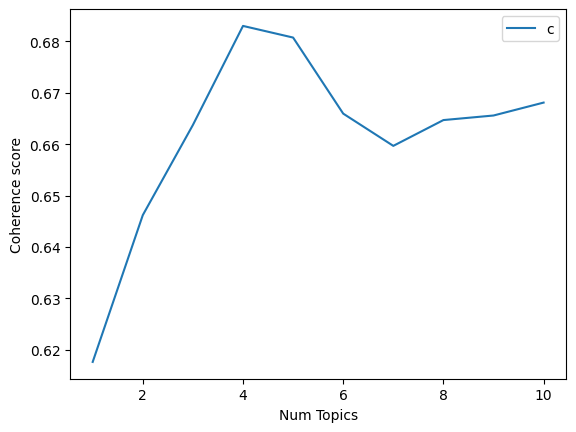

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
'''Print the coherence scores'''

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 15))

Num Topics = 1  has Coherence Value of 0.617637967244301
Num Topics = 2  has Coherence Value of 0.646197308416447
Num Topics = 3  has Coherence Value of 0.663737709246185
Num Topics = 4  has Coherence Value of 0.683008235727365
Num Topics = 5  has Coherence Value of 0.680743457048237
Num Topics = 6  has Coherence Value of 0.665947540965947
Num Topics = 7  has Coherence Value of 0.659672663122982
Num Topics = 8  has Coherence Value of 0.664691009497683
Num Topics = 9  has Coherence Value of 0.665579475134774
Num Topics = 10  has Coherence Value of 0.668093597141504


In [ ]:
model =  gensim.models.wrappers.ldamallet.LdaMallet(mallet_path, corpus=corpus_tfidf, id2word=dictionary, num_topics=4) # num_topics diganti sesuai nilai coherence tertinggi
lda_gensim = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model, iterations=1000)

for idx, topic in lda_gensim.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.125*"efektif" + 0.125*"bebas" + 0.125*"siap" + 0.125*"jurus" + 0.125*"untung" + 0.125*"giat" + 0.125*"jujur" + 0.125*"iya" + 0.000*"salam" + 0.000*"cari"
Topic: 1 Word: 0.167*"bener" + 0.111*"suka" + 0.111*"bijak" + 0.056*"kaya" + 0.056*"baik" + 0.056*"libur" + 0.056*"senang" + 0.056*"praktek" + 0.056*"keren" + 0.056*"tolong"
Topic: 2 Word: 0.250*"ya" + 0.167*"anak" + 0.167*"bagus" + 0.083*"cipta" + 0.083*"kabar" + 0.083*"indonesia" + 0.083*"nilai" + 0.083*"kurtilas" + 0.000*"cari" + 0.000*"era"
Topic: 3 Word: 0.067*"sukses" + 0.067*"kelas" + 0.067*"beneran" + 0.067*"bikin" + 0.067*"untung" + 0.067*"seru" + 0.067*"bebas" + 0.067*"ikut" + 0.067*"laksana" + 0.067*"nasional"


In [ ]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])


df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_excel("/content/top_words_topik_positif.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''untuk melihat data probabilitas words topik'''
top_words_topic = pd.read_excel('/content/top_words_topik_positif.xlsx')
top_words_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Topic,Word,P
0,0,0,efektif,0.125
1,1,0,bebas,0.125
2,2,0,siap,0.125
3,3,0,jurus,0.125
4,4,0,untung,0.125
5,5,0,giat,0.125
6,6,0,jujur,0.125
7,7,0,iya,0.125
8,8,0,salam,0.000
9,9,0,cari,0.000


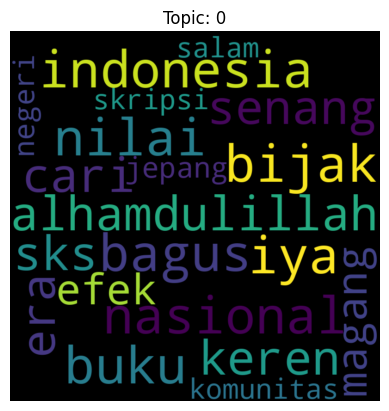

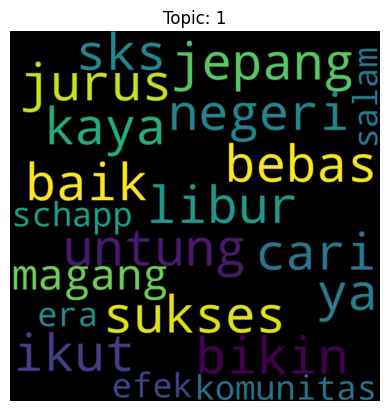

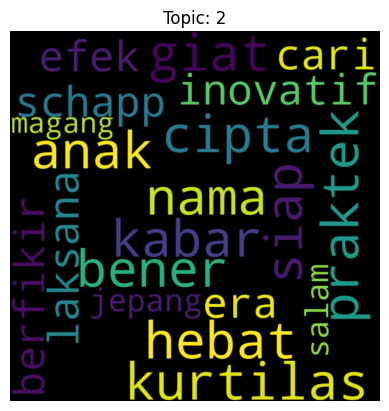

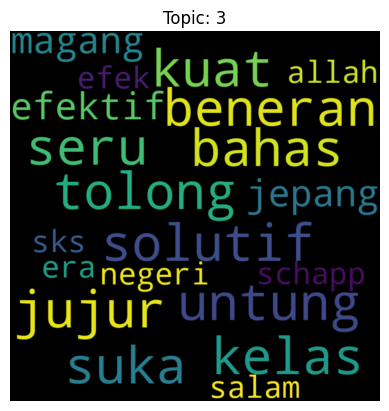

In [ ]:
'''membuat wordcloud per topik'''
from wordcloud import WordCloud
for topic_id, topic in enumerate(model.print_topics(num_topics=4, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

## **PyDlavis Visual**

In [ ]:
!pip install pyldavis==3.2.1
import pyLDAvis.gensim
import pickle
import pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136164 sha256=a7f23479c4dd98f4d611285841ddf3438b40b5930f770d929da8b8640c411325
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_gensim, corpus_tfidf, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
3     -0.228699  1.220742e-15       1        1  25.063732
1      0.133561 -3.952050e-01       2        1  25.027020
2      0.359210  2.521279e-01       3        1  24.964255
0     -0.264073  1.430771e-01       4        1  24.944993, topic_info=          Term   Freq       Total Category  logprob  loglift
215         ya  142.0  142.000000  Default     30.0     30.0
97       bener   94.0   94.000000  Default     29.0     29.0
284      bagus   94.0   94.000000  Default     28.0     28.0
30        anak   94.0   94.000000  Default     27.0     27.0
252      jujur   70.0   70.000000  Default     26.0     26.0
..         ...    ...         ...      ...      ...      ...
155    beneran    0.0   38.036077   Topic4     -inf     -inf
165  indonesia    0.0   47.356391   Topic4     -inf     -inf
185     sukses    0.0   38.036077   Topic4     -inf     -inf
186       kuat    0.0   38.036077   Topic4     -inf     -inf
215         ya    0.0  142.069173   Topic4     -inf     -inf

[217 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
325       1  0.999051  alhamdulillah
30        3  1.003033           anak
284       3  1.003033          bagus
261       1  0.999051          bahas
327       2  1.011049           baik
224       1  0.348573          bebas
224       4  0.651281          bebas
97        2  1.000517          bener
155       1  0.999051        beneran
98        2  0.995251          bijak
114       1  0.999051          bikin
0         1  0.545300           buku
0         2  0.459200           buku
393       3  0.992474          cipta
283       4  1.000285        efektif
85        4  1.000285           giat
236       2  1.011049          hebat
87        1  0.999051           ikut
165       3  0.992474      indonesia
375       1  0.999051       inovatif
278       4  1.000285            iya
252       4  1.000285          jujur
29        4  1.000285          jurus
328       3  0.992474          kabar
32        2  1.011049           kaya
60        1  0.999051          kelas
147       2  1.011049          keren
186       1  0.999051           kuat
376       3  0.992474       kurtilas
63        1  0.999051        laksana
70        2  1.011049          libur
51        2  1.011049           nama
233       1  0.999051       nasional
65        3  0.992474          nilai
53        2  1.011049        praktek
54        2  1.011049         senang
17        1  0.999051           seru
84        4  1.000285           siap
316       2  1.011049        solutif
10        2  0.995251           suka
185       1  0.999051         sukses
218       2  1.011049         tolong
229       1  0.348573         untung
229       4  0.651281         untung
215       3  0.999513             ya, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [ ]:
pyLDAvis.save_html('lda.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: save_html() missing 1 required positional argument: 'fileobj'